In [1]:
import requests
import pandas as pd
import xml.etree.ElementTree as ET
import os
import cv2
import torch
import torch.nn as nn
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
from PIL import Image
base_dir = os.getcwd()

In [2]:
munich_imgs = os.listdir("scraped_images_grayscaled_big")
furnitures = [r for r in munich_imgs if "linz" and "cp13150" in r ]
furnitures

['0270_1455_id=cp131505_linz.jpg',
 '0271_1458_id=cp131506_linz.jpg',
 '0606_3010_id=cp131502_linz.jpg',
 '0711_4263_id=cp131504_linz.jpg',
 '0791_4970_id=cp131503_linz.jpg',
 '1141_8563_id=cp131500_linz.jpg',
 '1153_8691_id=cp131501_linz.jpg',
 '1949_33905_id=cp131507_linz.jpg',
 '1950_33908_id=cp131508_linz.jpg',
 '1950_33912_id=cp131509_linz.jpg']

In [3]:
# #vgg models (16 and 19 similar, but 16 is better)
# model = torchvision.models.vgg16(pretrained=True)
# # model = torchvision.models.vgg19(pretrained=True)

# model.features[0] = nn.Conv2d(1,64,kernel_size=(3,3), stride=(1,1),padding=(1,1))
# model = nn.Sequential(*[*list(model.children())[:-1][0][:-10]])

# def preprocess_image(image_path):
#     """
#     This function takes a path to a single image, it then resizes it to size 50x50 \
#     and normalizes it to the range [0,1]. Lastly, it adds an extra dimension to the image \
#     which represents the batch size. These steps are needed, because we want to pass the image \
#     to a CNN. 
#     """

#     # Read the image in grayscale mode
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
#     if img is None:
#         raise ValueError(f"Image at path {image_path} could not be loaded.")
    
#     # Apply CLAHE (histogram equalization)
#     clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8))
#     img = clahe.apply(img)

#     # Apply thresholding
#     _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
#     contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     contours = sorted(contours, key=cv2.contourArea, reverse=True)
#     mask = np.ones(img.shape, np.uint8) * 255
#     cv2.drawContours(mask, contours, 0, 0, -1)
#     img = cv2.add(thresh, mask)

#     # Apply erosion
#     kernel = np.ones((5,5), dtype=np.uint8)
#     img = cv2.erode(img, kernel, 10)
#     img = np.abs(np.max(img) - img)

#     # Apply gamma correction
#     img = np.power(img / 255.0, 2.0) * 255.0
#     img = np.clip(img, 0, 255).astype(np.uint8)

#     # Resize image to 50x50
#     img = cv2.resize(img, (50, 50), interpolation=cv2.INTER_AREA)
    
#     # Convert image to tensor
#     preprocess = torchvision.transforms.Compose([
#         torchvision.transforms.ToTensor()
#     ])
#     img = preprocess(img).unsqueeze(0)
#     return img
# def extract_features(image_path):
#     """
#     This function takes a path to a single image, it then preprocesses the image with the \
#     function preprocess_image. Afterwards it passes the image to the pretrained CNN to extract \
#     a feature descriptor. 
#     """
    
#     img = preprocess_image(image_path)
#     with torch.no_grad():
#         features = model(img)
#     return features.squeeze(0).numpy()

# def normalize_features(features):
#     """
#     This function takes the feature descriptor and normalizes it. This is needed as we want \
#     to compute the dot-product similarity between feature descriptors of different images. \
#     And for similarity it is convenient to have all pixels on the same scale without too \
#     much magnitude differences and this also ensures stability. 
#     """
    
#     return features / np.linalg.norm(features)
    

In [4]:
# # Resnet models (gives high scores regardless)
# # model = torchvision.models.resnet50(pretrained=True)
# # model = torchvision.models.resnet101(pretrained=True) 
# # model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# # model = nn.Sequential(*list(model.children())[:-1])

# def preprocess_image(image_path):
#     """
#     This function takes a path to a single image, it then resizes it to size 50x50 \
#     and normalizes it to the range [0,1]. Lastly, it adds an extra dimension to the image \
#     which represents the batch size. These steps are needed, because we want to pass the image \
#     to a CNN. 
#     """
    
#     img = cv2.imread(image_path, -1)
#     clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8))
#     img = clahe.apply(img)
#     _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
#     contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     contours = sorted(contours, key=cv2.contourArea, reverse=True)
#     mask = np.ones(img.shape, np.uint8)
#     mask.fill(255)
#     cv2.drawContours(mask, contours, 0, 0, -1)
#     img = cv2.add(thresh, mask)
#     kernel = np.ones((5,5), dtype=np.uint8)
#     img = cv2.erode(img, kernel, 10)
#     img = np.abs(np.max(img) - img)
    
#     img = cv2.resize(img, (50, 50), interpolation=cv2.INTER_AREA)
#     preprocess = torchvision.transforms.Compose([
#         torchvision.transforms.ToTensor()
#     ])
#     img = preprocess(img).unsqueeze(0)
#     return img

# def extract_features(image_path):
#     """
#     This function takes a path to a single image, it then preprocesses the image with the \
#     function preprocess_image. Afterwards it passes the image to the pretrained CNN to extract \
#     a feature descriptor. 
#     """
    
#     img = preprocess_image(image_path)
#     with torch.no_grad():
#         features = model(img)
#     return features.squeeze(0).numpy()

# def normalize_features(features):
#     """
#     This function takes the feature descriptor and normalizes it. This is needed as we want \
#     to compute the dot-product similarity between feature descriptors of different images. \
#     And for similarity it is convenient to have all pixels on the same scale without too \
#     much magnitude differences and this also ensures stability. 
#     """
    
#     return features / np.linalg.norm(features)
    

In [3]:
# InceptionV3 model (potential)
model = torchvision.models.inception_v3(pretrained=True, aux_logits=True)

def preprocess_image(image_path):
    """
    Preprocesses a single image for InceptionV3 input.
    """
    # img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image as grayscale
    # img = cv2.resize(img, (299, 299))  # Resize to 299x299 for InceptionV3
    # img = np.array(img, dtype=np.float32) / 255.0  # Normalize to [0, 1]
    
    # # Since the model expects 3 channels, we stack the grayscale image to create 3 channels
    # img = np.stack([img, img, img], axis=-1)
    
    # img = (img - np.array([0.485, 0.456, 0.406])) / np.array([0.229, 0.224, 0.225])  # Normalize with ImageNet mean and std
    # img = np.transpose(img, (2, 0, 1))  # Transpose to (channels, height, width)
    # img = np.expand_dims(img, axis=0)  # Add batch dimension
    # img = torch.tensor(img, dtype=torch.float32)  # Convert to PyTorch tensor with dtype float32
        # Read the image as grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize to 299x299 for InceptionV3
    img = cv2.resize(img, (299, 299))
    
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)
    
    # Normalize to [0, 1]
    img = np.array(img, dtype=np.float32) / 255.0
    
    # Since the model expects 3 channels, we stack the grayscale image to create 3 channels
    img = np.stack([img, img, img], axis=-1)
    
    # Apply Gamma correction
    gamma = 1.2  # Example gamma value, adjust as necessary
    img = np.power(img, gamma)
    
    # Normalize with ImageNet mean and std
    img = (img - np.array([0.485, 0.456, 0.406])) / np.array([0.229, 0.224, 0.225])
    
    # Transpose to (channels, height, width)
    img = np.transpose(img, (2, 0, 1))
    
    # Add batch dimension
    img = np.expand_dims(img, axis=0)
    
    # Convert to PyTorch tensor with dtype float32
    img = torch.tensor(img, dtype=torch.float32)

    return img

def extract_features(image_path):
    """
    Extract features from a single image using InceptionV3.
    """
    img = preprocess_image(image_path)
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        features = model(img)
    return features.squeeze(0).numpy()

def normalize_features(features):
    """
    Normalize the extracted features.
    """
    return features / np.linalg.norm(features)


C:\Users\jacob\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jacob\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
# # Mobile net v2 (gives to high of scores to everything)
# model = torchvision.models.mobilenet_v2(pretrained=True)

# # Modify the first convolutional layer to accept grayscale images
# model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

# def preprocess_image(image_path):
#     """
#     Preprocesses a single grayscale image for MobileNetV2 input.
#     """
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image as grayscale
#     img = cv2.resize(img, (224, 224))  # Resize to 224x224 for MobileNetV2
#     img = np.array(img, dtype=np.float32) / 255.0  # Normalize to [0, 1]
    
#     img = np.expand_dims(img, axis=0)  # Add channel dimension
#     img = np.expand_dims(img, axis=0)  # Add batch dimension
#     img = torch.tensor(img, dtype=torch.float32)  # Convert to PyTorch tensor with dtype float32
#     return img

# def extract_features(image_path):
#     """
#     Extract features from a single image using MobileNetV2.
#     """
#     img = preprocess_image(image_path)
#     model.eval()  # Set model to evaluation mode
#     with torch.no_grad():
#         features = model.features(img)
#     return features.squeeze(0).numpy()

# def normalize_features(features):
#     """
#     Normalize the extracted features.
#     """
#     return features / np.linalg.norm(features)

In [7]:
# # DenseNet (gives similar scores to everything)
# model = torchvision.models.densenet121(pretrained=True)

# # Modify the first convolutional layer to accept grayscale images
# model.features.conv0 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# def preprocess_image(image_path):
#     """
#     Preprocesses a single grayscale image for DenseNet input.
#     """
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image as grayscale
#     img = cv2.resize(img, (224, 224))  # Resize to 224x224 for DenseNet
#     img = np.array(img, dtype=np.float32) / 255.0  # Normalize to [0, 1]
    
#     img = np.expand_dims(img, axis=0)  # Add channel dimension
#     img = np.expand_dims(img, axis=0)  # Add batch dimension
#     img = torch.tensor(img, dtype=torch.float32)  # Convert to PyTorch tensor with dtype float32
#     return img

# def extract_features(image_path):
#     """
#     Extract features from a single image using DenseNet.
#     """
#     img = preprocess_image(image_path)
#     model.eval()  # Set model to evaluation mode
#     with torch.no_grad():
#         features = model.features(img)
#     return features.squeeze(0).numpy()

# def normalize_features(features):
#     """
#     Normalize the extracted features.
#     """
#     return features / np.linalg.norm(features)


In [8]:
# # Alexnet (gives good scores unconditionally)
# model = torchvision.models.alexnet(pretrained=True)

# # Modify the first convolutional layer to accept grayscale images
# model.features[0] = nn.Conv2d(1, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))

# def preprocess_image(image_path):
#     """
#     Preprocesses a single grayscale image for AlexNet input.
#     """
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image as grayscale
#     img = cv2.resize(img, (224, 224))  # Resize to 224x224 for AlexNet
#     img = np.array(img, dtype=np.float32) / 255.0  # Normalize to [0, 1]
    
#     img = np.expand_dims(img, axis=0)  # Add channel dimension
#     img = np.expand_dims(img, axis=0)  # Add batch dimension
#     img = torch.tensor(img, dtype=torch.float32)  # Convert to PyTorch tensor with dtype float32
#     return img

# def extract_features(image_path):
#     """
#     Extract features from a single image using AlexNet.
#     """
#     img = preprocess_image(image_path)
#     model.eval()  # Set model to evaluation mode
#     with torch.no_grad():
#         features = model.features(img)
#     return features.squeeze(0).numpy()

# def normalize_features(features):
#     """
#     Normalize the extracted features.
#     """
#     return features / np.linalg.norm(features)

In [4]:
list(model.children())

[BasicConv2d(
   (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
   (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
 ),
 BasicConv2d(
   (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
   (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
 ),
 BasicConv2d(
   (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
 ),
 MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
 BasicConv2d(
   (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
 ),
 BasicConv2d(
   (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
   (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
 ),
 MaxPo

In [5]:
# best_model_state_dict = model.state_dict()
# torch.save(best_model_state_dict, "best_inception_v3_weights.pth")
best_model_state_dict = torch.load("best_inception_v3_weights.pth")
model.load_state_dict(best_model_state_dict)
model.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [7]:
def compute_similarities_testsets(munich_testset, nk_testset, 
                                  munich_path="munich_test_no_back", 
                                  nk_path="nk_test_no_back"):
    """
    This function takes four arguments: 
    - munich_testset, which contains 5 grayscaled images from the munich database.
    - nk_testset, which contains 5 grayscaled images from the nk collection API.
    - munich path, the path to the directory of the munich images. 
    - nk_path, the path to the directory of the nk images. 
    
    It then computes the feature descriptors for the munich images and all the \
    nk collection images. Afterwards takes the dot-product to get the dot-product similiarity. 
    It then saves the similarity and the two images as key-value pairs in a dictionary. 
    """
    
    similarities = {}
    for nk_img in nk_testset:
        nk_img_path = os.path.join(nk_path, nk_img)
        for munich_img in munich_testset:
            munich_img_path = os.path.join(munich_path, munich_img)
            nk_img_feature_descriptor = normalize_features(extract_features(nk_img_path).flatten())
            munich_img_feature_descriptor = normalize_features(extract_features(munich_img_path).flatten())
            similarity = np.dot(
                nk_img_feature_descriptor,
                munich_img_feature_descriptor
            )
            similarities[(nk_img, munich_img)] = similarity.item()
        
    return similarities

def compute_similarities_img_to_set(nk_img, munich_testset, 
                                    munich_path="mc_no_back", 
                                    nk_path="nk_no_back"):
    similarities = {}
    nk_img_path = os.path.join(nk_path, nk_img)
    
    # Ensure the NK image file exists
    if not os.path.exists(nk_img_path):
        raise FileNotFoundError(f"NK image file {nk_img_path} not found.")
    
    nk_img_feature_descriptor = normalize_features(extract_features(nk_img_path).flatten())

    print(munich_testset)
    return
    
    for munich_img in munich_testset:
        munich_img_path = os.path.join(munich_path, munich_img)
        
        # Ensure the Munich image file exists
        if not os.path.exists(munich_img_path):
            raise FileNotFoundError(f"Munich image file {munich_img_path} not found.")
        
        munich_img_feature_descriptor = normalize_features(extract_features(munich_img_path).flatten())
        similarity = np.dot(
            nk_img_feature_descriptor,
            munich_img_feature_descriptor
        )
        similarities[(nk_img, munich_img)] = similarity.item()
        
    return similarities

In [7]:
nk_testset = os.listdir("nk_test_no_back")
munich_testset = os.listdir("munich_test_no_back")

sims_test = compute_similarities_testsets(munich_testset, nk_testset)
sims_test

FileNotFoundError: [WinError 3] Het systeem kan het opgegeven pad niet vinden: 'nk_test_no_back'

In [24]:
import os
import numpy as np
import cv2
import torch
from concurrent.futures import ThreadPoolExecutor, as_completed
from torchvision import models, transforms

model = models.inception_v3(pretrained=True, aux_logits=True)
best_model_state_dict = torch.load("best_inception_v3_weights.pth")
model.eval()


def preprocess_image(image_path):
    """
    Preprocesses a single image for InceptionV3 input.
    """
    # Read the image as grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize to 299x299 for InceptionV3
    img = cv2.resize(img, (299, 299))
    
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)
    
    # Normalize to [0, 1]
    img = np.array(img, dtype=np.float32) / 255.0
    
    # Since the model expects 3 channels, we stack the grayscale image to create 3 channels
    img = np.stack([img, img, img], axis=-1)
    
    # Apply Gamma correction
    gamma = 1.2  # Example gamma value, adjust as necessary
    img = np.power(img, gamma)
    
    # Normalize with ImageNet mean and std
    img = (img - np.array([0.485, 0.456, 0.406])) / np.array([0.229, 0.224, 0.225])
    
    # Transpose to (channels, height, width)
    img = np.transpose(img, (2, 0, 1))
    
    # Add batch dimension
    img = np.expand_dims(img, axis=0)
    
    # Convert to PyTorch tensor with dtype float32
    img = torch.tensor(img, dtype=torch.float32)

    return img

def extract_features(image_path):
    """
    Extract features from a single image using InceptionV3.
    """
    img = preprocess_image(image_path)
    with torch.no_grad():
        features = model(img)
    return features.squeeze(0).numpy()

def normalize_features(features):
    """
    Normalize the extracted features.
    """
    return features / np.linalg.norm(features)

def compute_similarity(nk_img_feature_descriptor, munich_img_path):
    if not os.path.exists(munich_img_path):
        raise FileNotFoundError(f"Munich image file {munich_img_path} not found.")
    
    munich_img_feature_descriptor = normalize_features(extract_features(munich_img_path).flatten())
    similarity = np.dot(nk_img_feature_descriptor, munich_img_feature_descriptor)
    return similarity.item()

def compute_similarities_img_to_set(nk_img, munich_testset, munich_path="mc_no_back", nk_path="nk_no_back", max_workers=6):
    similarities = {}
    counter = 0
    nk_img_path = os.path.join(nk_path, nk_img)
    
    # Ensure the NK image file exists
    if not os.path.exists(nk_img_path):
        raise FileNotFoundError(f"NK image file {nk_img_path} not found.")
    
    nk_img_feature_descriptor = normalize_features(extract_features(nk_img_path).flatten())
    
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_munich_img = {executor.submit(compute_similarity, nk_img_feature_descriptor, os.path.join(munich_path, munich_img)): munich_img for munich_img in munich_testset}
        
        for future in as_completed(future_to_munich_img):
            munich_img = future_to_munich_img[future]
            try:
                similarity = future.result()
                similarities[(nk_img, munich_img)] = similarity
            except Exception as exc:
                print(f"Munich image {munich_img} generated an exception: {exc}")
            # print(f"Processed {counter} images")
    
    return similarities

C:\Users\jacob\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jacob\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [25]:
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights

def classify_image(img_name):
    image = Image.open(os.path.join('nk_collection_schilderij_cleaned', img_name)).convert('RGB')

    # Step 1: Initialize model with the best available weights
    weights = ResNet50_Weights.DEFAULT
    model = resnet50(weights=weights)
    model.eval()

    # Step 2: Initialize the inference transforms
    preprocess = weights.transforms()

    # Step 3: Apply inference preprocessing transforms
    batch = preprocess(image).unsqueeze(0)

    # Step 4: Use the model and print the predicted category
    prediction = model(batch).squeeze(0).softmax(0)
    class_id = prediction.argmax().item()
    score = prediction[class_id].item()
    category_name = weights.meta["categories"][class_id]
    return category_name

In [115]:
# munich_set = os.listdir("scraped_images_grayscaled_big")
import csv
nk_img = ("schilderij_60.jpg")
nk_category = classify_image(nk_img)
print(nk_category)

munich_set = []

with open('image_categories.csv', newline='') as csvfile:

    img_reader = csv.reader(csvfile, delimiter=',', quotechar='|')

    for row in img_reader:
        if row[1] == nk_category:
            munich_set += [row[0]]
print(len(munich_set))
sims = compute_similarities_img_to_set(nk_img, munich_set, munich_path='scraped_images_grayscaled_big' ,nk_path='nk_collection_schilderij_cleaned')
# print(sims)

thresher
472


In [15]:
def get_table(sims):
    """
    This function takes the output produced by either the compute_similarities \ 
    or compute_similarities_testsets function, and returns a pandas dataframe/table \
    and also saves it in excel.
    """
    
    data = {}
    rows = []

    for key, value in sims.items():
        if key[0] not in data:
            data[key[0]] = []
        if key[1] not in rows:
            rows.append(key[1])
        data[key[0]].append(value)
        
    data = {key[:key.rfind(".")]:value for key, value in data.items()}
    rows = [row[:row.rfind(".")] for row in rows]
        
    df = pd.DataFrame(data, index=rows)
    #df.to_excel('output.xlsx')
    return df.T
    
get_table(sims_test)

NameError: name 'sims_test' is not defined

Top 10 similar images for NK image 'schilderij_60.jpg':


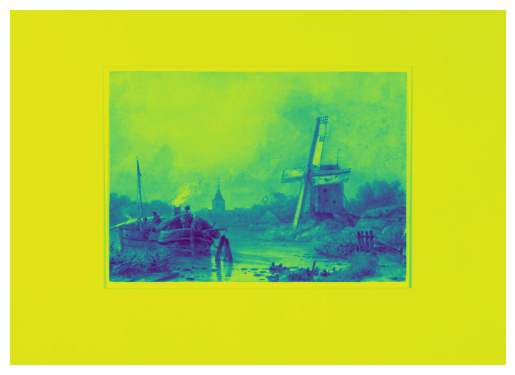

Munich image '0368_1650_id=cp130651_linz.jpg' (Similarity: 0.7327188849449158)


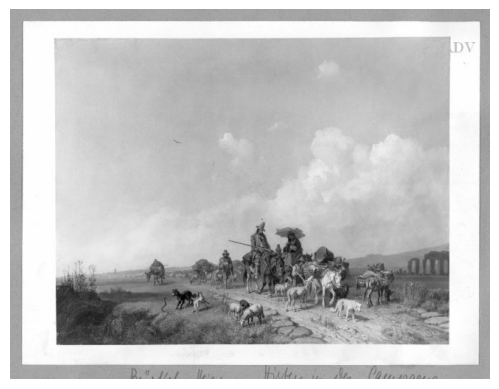

Munich image '0551_2614_id=cp151683_badv.jpg' (Similarity: 0.707347571849823)


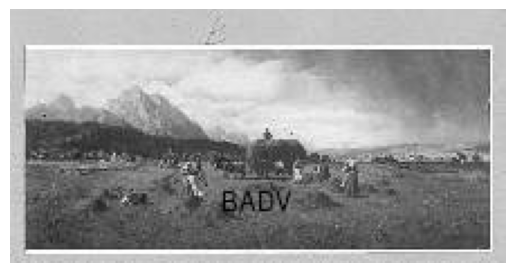

Munich image '2269_46555_id=cp164692_badv.jpg' (Similarity: 0.695639967918396)


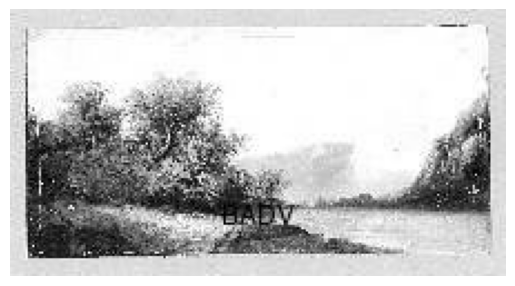

Munich image '2308_47657_id=cp165756_badv.jpg' (Similarity: 0.6955536007881165)


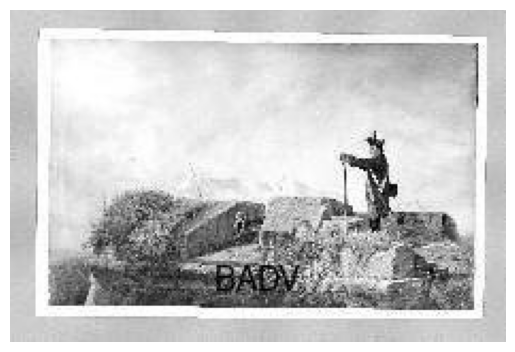

Munich image '1216_9335_id=cp176078_badv.jpg' (Similarity: 0.6926552057266235)


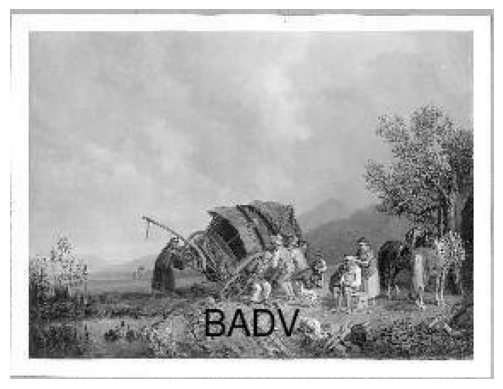

Munich image '0790_4955_id=cp132179_linz.jpg' (Similarity: 0.6884588003158569)


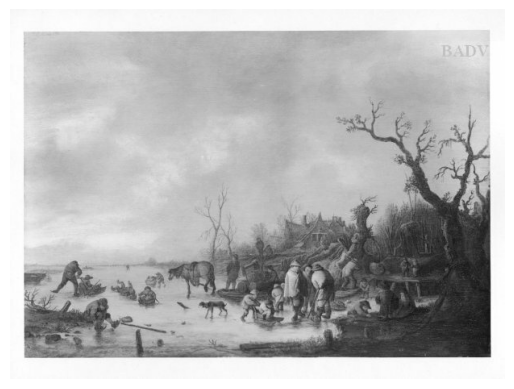

Munich image '1525_13353_id=cp140106_badv.jpg' (Similarity: 0.6880145072937012)


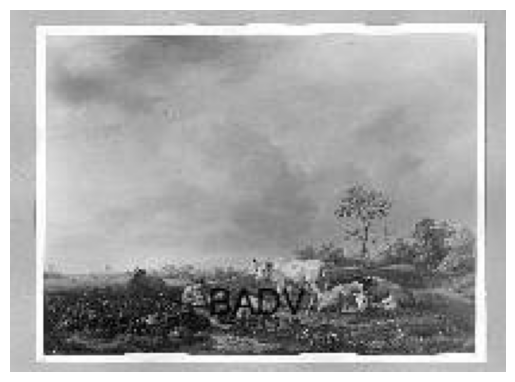

Munich image '1275_9904_id=cp177763_badv.jpg' (Similarity: 0.6812294125556946)


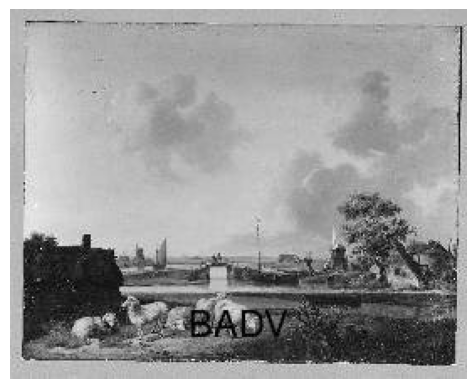

Munich image '1319_10720_id=cp135784_badv.jpg' (Similarity: 0.6811542510986328)


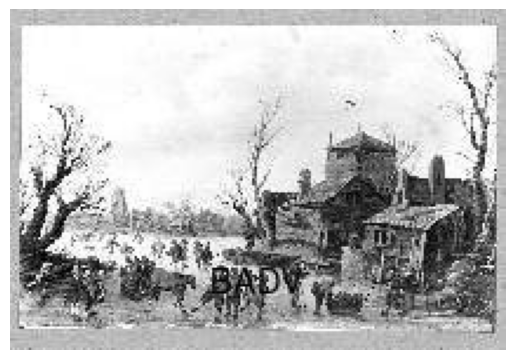

Munich image '0398_1816-1_id=cp130251_linz.jpg' (Similarity: 0.6806854009628296)


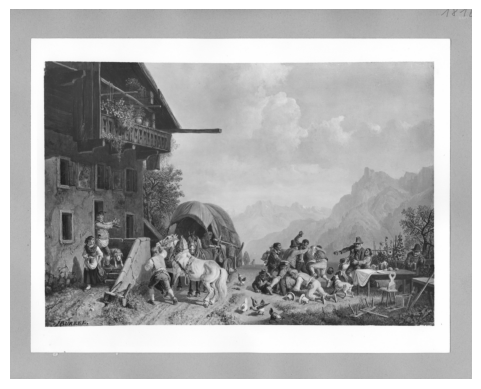

Munich image '0716_4304_id=cp161408_badv.jpg' (Similarity: 0.6752332448959351)


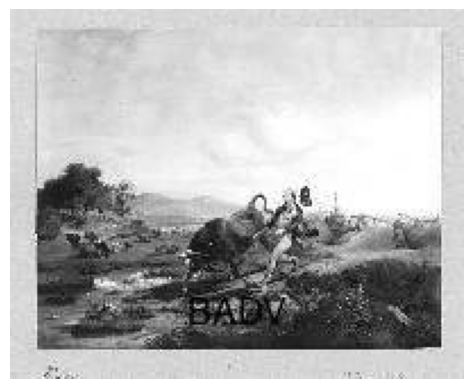

Munich image '1235_9522_id=cp176740_badv.jpg' (Similarity: 0.6751136183738708)


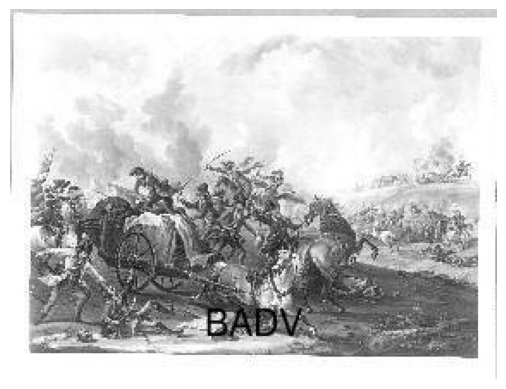

Munich image '0151_938-10_id=cp176162_badv.jpg' (Similarity: 0.6735410094261169)


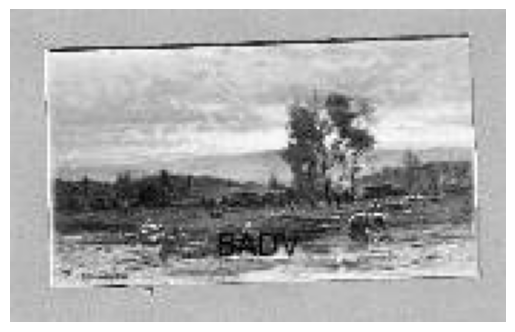

Munich image '2080_41312_id=cp159281_badv.jpg' (Similarity: 0.6728951930999756)


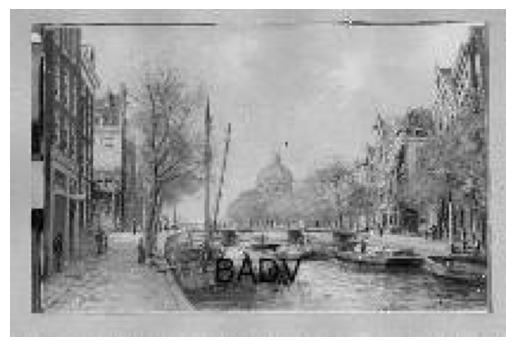

Munich image '2356_48807_id=cp166869_badv.jpg' (Similarity: 0.6715790033340454)


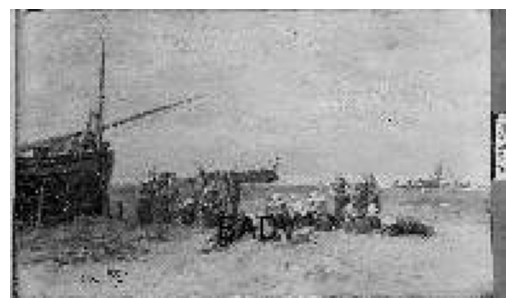

Munich image '1483_12615_id=cp138946_badv.jpg' (Similarity: 0.6710047125816345)


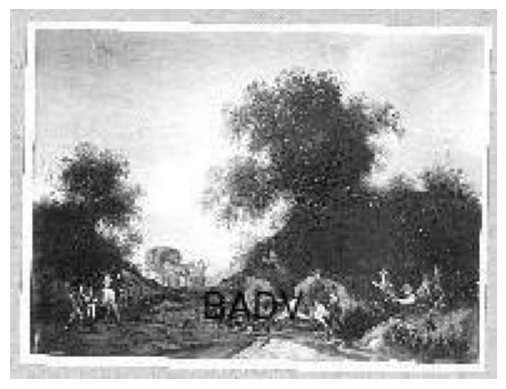

Munich image '1687_20045_id=cp146447_badv.jpg' (Similarity: 0.6622524857521057)


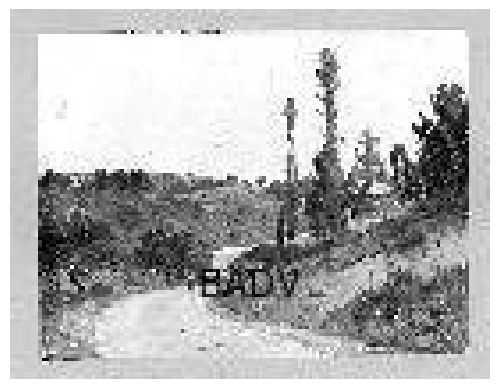

Munich image '1301_10421_id=cp135463_badv.jpg' (Similarity: 0.6613994240760803)


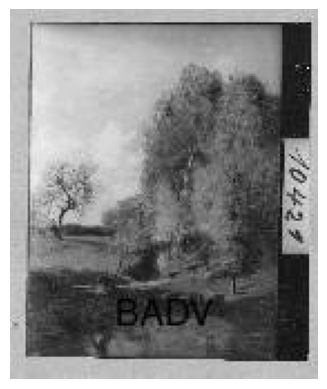

Munich image '1779_22352-9_id=cp148477_badv.jpg' (Similarity: 0.659056544303894)


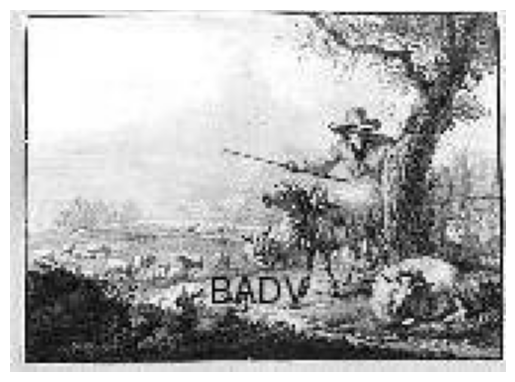

Munich image '1274_9899_id=cp133847_linz.jpg' (Similarity: 0.657715916633606)


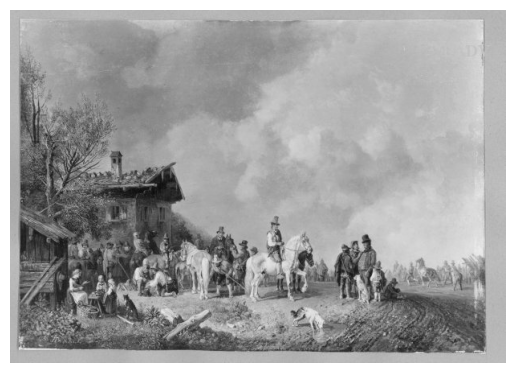

In [116]:
def get_top_10_similarities(similarities):
    """
    Get the top 10 highest similarity values for each NK image from the similarities dictionary.
    
    Parameters:
    - similarities: A dictionary where keys are (NK image name, Munich image name) tuples
                    and values are similarity scores.
                    
    Returns:
    - A dictionary where keys are NK image names and values are lists of tuples
      (Munich image name, similarity) sorted by similarity in descending order.
    """
    top_10_similarities = {}
    
    for nk_img_name in set(key[0] for key in similarities.keys()):
        # Filter similarities for current NK image
        nk_similarities = [(munich_img_name, similarity) for (nk, munich_img_name), similarity in similarities.items() if nk == nk_img_name]
        
        # Sort by similarity in descending order
        sorted_similarities = sorted(nk_similarities, key=lambda x: x[1], reverse=True)
        
        # Get top 10 similarities
        top_10_similarities[nk_img_name] = sorted_similarities[:20]
    
    return top_10_similarities

def display_image(image_path):
    image = imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def display_nk_image(nk_img_name):
    image_path = f"nk_collection_schilderij_cleaned/{nk_img_name}"
    image = imread(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


top_10 = get_top_10_similarities(sims)

for nk_img_name, similar_images in top_10.items():
    print(f"Top 10 similar images for NK image '{nk_img_name}':")
    display_nk_image(nk_img_name)
    for munich_img_name, similarity in similar_images:
        image_path = f"scraped_images_grayscaled_big/{munich_img_name}"
        print(f"Munich image '{munich_img_name}' (Similarity: {similarity})")
        display_image(image_path)
        
